In [2]:
# Imports 

import math

import matplotlib.pyplot as plt

In [14]:
# Config 

rho_max = 0.2
tp_max = 14
tp_min = 2
N = 60
p = 60

BW = 125
PL = 30
CR = 1

TP_SET = [2,5,8,11,14]
SF_SET = [7,8,9,10,11,12]
CH_SET = ['868.1','868.3','868.5']

In [12]:
def toa (sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds

def rho_compute(sf,n) : 
    return (toa(sf,CR,PL,BW)*n)/p

def reward_function(rho,u_ch,tp):
    return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))


In [15]:
rewards = []
tx = 14
for sf in SF_SET:
    rho = rho_compute(sf,10)
    rewards.append(reward_function(rho,20,tx))
    if tx >= 5:
        tx = tx -3
    else:
        tx = 2
print(rewards)

[0.8340747330960854, 0.7362551867219918, 0.7651300904977376, 0.8825650452488688, 1.0662825226244343, 1.0364388992537314]


In [ ]:
def action_space_generator():
    action_space = []
    for sf in SF_SET:
        for tp in TP_SET:
            for ch in CH_SET:
                action_space.append([sf,tp,ch])
    return action_space 

In [73]:
import gym
import numpy as np
env = gym.make('Taxi-v3')

# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

P = {
        state: {action: [] for action in range(action_space.n)}
        for state in range(obs_space.n)
    }
#print(P)

The observation space: Discrete(500)
The action space: Discrete(6)


In [95]:
from gym import spaces
action_space = spaces.Box( np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
print(action_space.sample())
print(action_space.shape)


11
(3,)


In [83]:
import gym
from gym import spaces
N = 100

class LoraWANEnv (gym.Env):
    
    def __init__(self):
        self.action_space = spaces.Box(np.array([7,2,0]), np.array([12,14,2]),dtype =np.int)
        self.observation_space = spaces.Box(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]), np.array([N,N,N,N,N,N,N,N,N,N,N,N,N,N]),dtype =np.int)
    
    
    def toa (self,sf, cr, pl, bw):
        H = 0  # implicit header disabled (H=0) or not (H=1)
        DE = 0  # low data rate optimization enabled (=1) or not (=0)
        Npream = 8  # number of preamble symbol (12.25  from Utz paper)

        if bw == 125 and sf in [11, 12]:
            # low data rate optimization mandated for BW125 with SF11 and SF12
            DE = 1
        if sf == 6:
            # can only have implicit header with SF6
            H = 1
        Tsym = (2.0 ** sf) / bw  # msec
        Tpream = (Npream + 4.25) * Tsym
        # print "sf", sf, " cr", cr, "pl", pl, "bw", bw
        payloadSymbNB = 8 + max(
            math.ceil((8.0 * pl - 4.0 * sf + 28 + 16 - 20 * H) / (4.0 * (sf - 2 * DE)))
            * (cr + 4),
            0,
        )
        Tpayload = payloadSymbNB * Tsym
        return (Tpream + Tpayload) / 1000.0  # in seconds


    def rho_compute(self,sf,n) : 
        return (self.toa(sf,CR,PL,BW)*n)/p

    def reward_function(self,rho,u_ch,tp):
        return (rho_max)/(rho*u_ch) + ((tp_max - tp)/(tp_max-tp_min))
    
    def reset(self):
        pass
    
    def step(self, action):
        assert self.action_space.contains(action)
        
        return observation, reward, done, info
    
    def render(self):
        pass
    
    def close(self):
        pass
        

env =LoraWANEnv()
print(env.observation_space.shape)
print(env.action_space.sample())
print(type(env.observation_space))



(14,)
[ 7 14  2]
<class 'gym.spaces.box.Box'>


In [19]:
action_space = spaces.Box( low=5,high =10, shape =(5,),dtype =np.int)
print(action_space.sample())


[7 8 5 5 8]


In [1]:
from gym import spaces
space = spaces.Tuple((
  spaces.Discrete(5),
  spaces.Discrete(4),
  spaces.Box(low=0, high=1, shape=(2, 2))))
print(space.sample())
print(space.shape)

(0, 2, array([[0.40701246, 0.01831591],
       [0.63941157, 0.9320467 ]], dtype=float32))
None


In [5]:
def reward_plot(rewards):
    plt.plot(rewards) 
    plt.show()



In [6]:
rewards =[108.05203619909501, 303.3882505842672, 250.1829378753965, 81.78902714932126, 59.76390811778212, 32.15689897514689, 3.179259950248756, 79.09052942115244, 382.8061316729584, 21.094174208144793, 277.2911018381179, 53.27601809954751, 17.425339366515836, 81.78902714932126, 342.9176730891804, 117.13970588235293, 95.54553167420812, 16.00650452488688, 141.1932975113122, 49.35718325791855, 107.1035384709262, 9.837669683257918, 26.013009049773753, 161.8280542986425, 20.911811840120663, 85.40747330960853, 115.33559429968079, 199.25207468879668, 141.97255261823847, 173.38606109536056, 34.127733785822016, 38.49667879493933, 33.39126131221719, 11.717039800995025, 23.594174208144793, 8.87825226244344, 133.56504524886876, 489.50518672199166, 118.11004299581307, 20.283859267013348, 4.393889925373134, 74.66077488687782, 15.256504524886877, 238.36708144796378, 108.55203619909501, 8.858519900497512, 129.71604809335162, 139.47297346258512, 148.82154977375563, 80.03902714932126, 41.588568751266294, 295.753112033195, 224.22841291000918, 55.77601809954751, 11.467039800995025, 149.3582206023169, 29.11771776018099, 8.837669683257918, 9.337669683257918, 7.141779788838612, 21.544284375633147, 44.88845858377794, 62.404270361990946, 108.80203619909501, 5.628252262443438, 18.61502442538439, 18.097685708898943, 16.570630656108595, 15.166032113189708, 9.522142187816574, 41.76951357466063, 37.35067873303167, 130.18288123580106, 163.11472512720377, 139.47297346258512, 67.78252262443438, 254.96526304425376, 13.256504524886875, 14.756504524886877, 11.824142156862745, 118.11527172804516, 73.45135746606334, 12.256504524886877, 175.1931988816605, 17.675339366515836, 48.29305712669683, 19.202394419306184, 12.756504524886877, 9.145786199095022, 14.756504524886877, 10.047087104072398, 13.651795814479637, 16.570630656108595, 111.95996441281137, 352.80523260494994, 10.337669683257918, 21.37122926093514, 43.088568751266294, 151.52705544394584, 68.28252262443438, 22.044284375633147, -5, 49.27601809954751, 41.01951357466063, 99.92378393665157, 81.78902714932126, 63.86368778280543, 32.931843891402714, 63.11368778280543, 68.78252262443438, 119.55854072398189, 66.0731052036199, 38.10067873303167, 16.175339366515836, 59.563797950293775, 3.2877798507462686, -5, 30.891261312217193, 18.884756787330314, 9.837669683257918, 8.285315328054297, 7.378252262443439, 5.9711891968325785, 8.62825226244344, 15.006504524886875, 5.628252262443438, 8.901548359728508, 78.70581194495034, 49.39776583710407, 139.27055091905896, 31.95889894419306, 82.53902714932126, 112.25754186928522, 284.5788816888642, -5, -5, 58.944852941176464, 13.492976998491702, 9.087669683257918, 31.29148164719389, 9.337669683257918, 11.047087104072396, 14.756504524886877, 202.15738200403047, 7.128252262443438, 27.513009049773753, 27.013009049773753, 231.91908713692942, 2.0, 114.92637671091418, -5, -5, 132.81504524886876, -5, 331.12989323843414, -5, 11.297087104072398, 18.230158244411427, 10.837669683257918, 12.151795814479637, 8.837669683257918, 10.047087104072396, 64.5731052036199, 9.837669683257918, 8.285315328054297, 9.667079091251885, 11.047087104072396, 11.047087104072396, 11.047087104072396, 2.418834841628959, -5, -4.0, -4.0, 21.675339366515836, 15.533559577677224, 19.215921945701357, 22.161811840120663, 16.25650452488688, 25.844174208144793, 34.09137147970554, 25.908300339366516, 16.570630656108595, 81.53902714932126, 82.03902714932126, 201.34756787330315, 108.30203619909501, 59.444852941176464, 12.297087104072396, 141.44329751131218, 22.134756787330314, 77.88852772197292, 90.37669683257917, 46.688348416289585, 46.688348416289585, 46.93834841628959, 69.03252262443438, 50.857183257918535, 46.688348416289585, 38.10067873303167, 46.688348416289585, 88.37669683257917, 45.938348416289585, 53.02601809954751, 88.37669683257917, 63.363687782805414, 21.594174208144793, -3.5, 38.35067873303167, 42.76951357466063, 35.87773378582202, 10.942378393665157, 14.256504524886877, 30.26300904977375, 770.9296586628956, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1334.5195729537365, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1433.520610298135, 1335.7695729537365, 1669.3994661921706, 1334.5195729537365, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1669.3994661921706, 1335.5195729537365, 375.14940681309474, 14.72944947209653, 190.75207468879668, 10.520032051282051, 14.72944947209653, 14.72944947209653, 12.783559577677224, 120.0585407239819, 70.95135746606334, 14.72944947209653, 14.992976998491702, 11.047087104072396, 11.047087104072396, 11.047087104072396, 11.047087104072396, 9.587669683257918, 13.506504524886877, 22.094174208144793, 22.094174208144793, 22.094174208144793, 22.094174208144793, 18.175339366515836, 40.01951357466063, 33.14126131221719, 27.513009049773753, 32.431843891402714, 22.094174208144793, 30.791481647193894, 22.094174208144793, 22.094174208144793, 22.094174208144793, 22.094174208144793, 22.094174208144793, 22.094174208144793, 22.094174208144793, 31.371528950271266, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 44.188348416289585, 35.60067873303167, 44.18834841628959, 66.28252262443438, 66.28252262443438, 125.51404639417208, 225.51508373857044, 329.1701244813278, 262.33609958506224, 225.51508373857044, 329.1701244813278, 329.1701244813278]

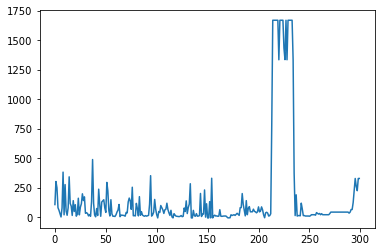

In [8]:
reward_plot(rewards)